In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
imported_data = pd.read_csv('https://aranaur.quarto.pub/asa-2324-04-lab/data/aa.csv', delimiter=';')

In [3]:
imported_data

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [4]:
def get_AA_res(df, 
               n_iter=10000, 
               n_in_sample=1000):
    
    res_list=[]
    one_list=[]
    
    for i in range(n_iter):
        group_A_1 = np.random.choice(df[df['experimentVariant']==0]['purchase'],size=n_in_sample, replace=False)
        group_A_2 = np.random.choice(df[df['experimentVariant']==1]['purchase'],size=n_in_sample, replace=False)
        
        _, p_value = mannwhitneyu(group_A_1, group_A_2)
        
        res_list.append(p_value)
        one_list.append(p_value<0.05)
        
    return res_list, np.mean(one_list)

In [5]:
res_list, FP = get_AA_res(imported_data)

In [6]:
FP

0.9323

*FPR > 0.05*

<Axes: ylabel='Count'>

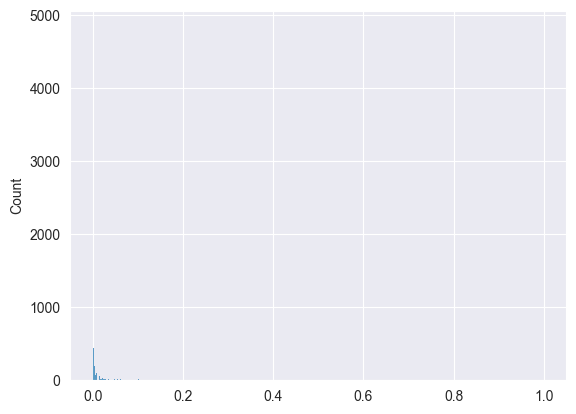

In [7]:
sns.histplot(res_list)

*Бачимо викид*

In [8]:
imported_data.groupby(by=['experimentVariant', 'version'], as_index=False)['purchase'].mean()

,experimentVariant,version,purchase
0,0,v2.8.0,0.000993
1,0,v2.9.0,0.074658
2,0,v3.7.4.0,0.059943
3,0,v3.8.0.0,0.057604
4,1,v2.8.0,0.045606
5,1,v2.9.0,0.071304
6,1,v3.7.4.0,0.063018
7,1,v3.8.0.0,0.062848


*Бачимо що середнє значення купівель для версії 2.8.0 відрізняється від інших* 

In [9]:
p_values_by_version = {}

grouped_data = imported_data.groupby('version')

for version, data in grouped_data:
    t_statistic, p_value = ttest_ind(data[data['experimentVariant'] == 0]['purchase'],
                                      data[data['experimentVariant'] == 1]['purchase'])
    p_values_by_version[version] = p_value

print("P-значення для кожної версії додатка:")
for version, p_value in p_values_by_version.items():
    print(f"Версія {version}: {p_value}")

P-значення для кожної версії додатка:
Версія v2.8.0: 0.0
Версія v2.9.0: 0.3183089516720744
Версія v3.7.4.0: 0.5568886771079735
Версія v3.8.0.0: 0.23186933664059722


In [10]:
new_df = imported_data[imported_data['version'] != 'v2.8.0']

*Прибираємо 2.8.0*

In [11]:
res_list_new, FP_new = get_AA_res(new_df)

In [12]:
FP_new

0.0435

*Новий FPR < 0.05. Отже версія 2.8.0 не коректно впливала на результати АА тесту*